<a href="https://colab.research.google.com/github/shulc30/BTC_Predictions/blob/main/BTC_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 6.4 MB/s eta 0:00:00


In [ ]:

from binance.client import Client
import pandas as pd

api_key = ''
api_secret = ''

client = Client(api_key, api_secret, testnet=True)

futures_data = client.futures_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1HOUR, limit=1500)

df = pd.DataFrame(futures_data, columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])

df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

df['open']=df['open'].astype(float)
df['high']=df['high'].astype(float)
df['low']=df['low'].astype(float)
df['close']=df['close'].astype(float)
df['volume']=df['volume'].astype(float)
df = df.drop(columns = ['Quote asset volume', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'], axis=1)

df

,open_time,open,high,low,close,volume,close_time,Number of trades
0,2023-02-02 01:00:00,24195.8,24200.2,23608.0,23953.3,8313.516,2023-02-02 01:59:59.999,1580
1,2023-02-02 02:00:00,23960.7,25699.0,23663.0,23885.1,6946.650,2023-02-02 02:59:59.999,2190
2,2023-02-02 03:00:00,23884.0,25600.0,23799.9,23851.1,6681.613,2023-02-02 03:59:59.999,1294
3,2023-02-02 04:00:00,23799.9,25600.0,23663.0,23878.4,5885.384,2023-02-02 04:59:59.999,2015
4,2023-02-02 05:00:00,23881.9,24221.0,23608.0,23868.1,6181.127,2023-02-02 05:59:59.999,1694
...,...,...,...,...,...,...,...,...
1495,2023-04-05 08:00:00,28522.3,28631.0,28372.3,28538.9,6717.546,2023-04-05 08:59:59.999,1942
1496,2023-04-05 09:00:00,28542.9,28651.0,28472.6,28509.5,6421.411,2023-04-05 09:59:59.999,2075
1497,2023-04-05 10:00:00,28509.5,28585.5,28474.1,28495.1,5356.894,2023-04-05 10:59:59.999,1821
1498,2023-04-05 11:00:00,28495.1,28747.2,28480.5,28552.3,6886.014,2023-04-05 11:59:59.999,2342


In [ ]:
from binance.client import Client
import pandas as pd
import time

api_key = ''
api_secret = ''
client = Client(api_key, api_secret, testnet=True)

# Определение начального времени запроса
end_time = int(time.time() * 1000)
print(end_time)
print(pd.to_datetime(end_time, unit='ms')+pd.Timedelta(hours=3))

# Инициализация счетчика циклов
num_cycles = 10

# Инициализация пустого DataFrame
df = pd.DataFrame(columns=['Opentime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Closetime', 'Quotee', 'Number', 'TakerBuyBaseAssetVolume', 'TakerBuyQuoteAssetVolume', 'Ignore'])

# Цикл запроса и сохранения котировок
for i in range(num_cycles):
    # Запрос котировок по 1000 штук
    futures_data = client.futures_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1HOUR, limit=1000, endTime=end_time)
    if not futures_data:
        # Если список котировок пуст, значит достигнут конец исторических данных
        break

    # Преобразование данных в DataFrame и добавление в основной DataFrame
    temp_df = pd.DataFrame(futures_data, columns=['Opentime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Closetime', 'Quotee', 'Number', 'TakerBuyBaseAssetVolume', 'TakerBuyQuoteAssetVolume', 'Ignore'])
    df = pd.concat([temp_df, df], ignore_index=True)

    # Обновление начального времени для следующего запроса
    #start_time = int(temp_df.iloc[-1]['Close time'])
    end_time = int(temp_df.Opentime[0]-1)

    # Увеличение счетчика циклов
    print(f'Цикл {i}: {len(futures_data)} Записей добавлено.')

    # Задержка перед следующим запросом
    time.sleep(1)

print('Получение данных завершено.')
df['Opentime'] = pd.to_datetime(df['Opentime'], unit='ms')+pd.Timedelta(hours=3)
df['Closetime'] = pd.to_datetime(df['Closetime'], unit='ms')+pd.Timedelta(hours=3)
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Quotee', 'TakerBuyBaseAssetVolume', 'TakerBuyQuoteAssetVolume']] = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Quotee', 'TakerBuyBaseAssetVolume', 'TakerBuyQuoteAssetVolume']].astype(float)
df=df.set_index('Opentime')
df

1680775388436
2023-04-06 13:03:08.436000
Цикл 0: 1000 Записей добавлено.
Цикл 1: 1000 Записей добавлено.
Цикл 2: 1000 Записей добавлено.
Цикл 3: 1000 Записей добавлено.
Цикл 4: 1000 Записей добавлено.
Цикл 5: 1000 Записей добавлено.
Цикл 6: 1000 Записей добавлено.
Цикл 7: 1000 Записей добавлено.
Цикл 8: 1000 Записей добавлено.
Цикл 9: 1000 Записей добавлено.
Получение данных завершено.


,Open,High,Low,Close,Volume,Closetime,Quotee,Number,TakerBuyBaseAssetVolume,TakerBuyQuoteAssetVolume,Ignore
Opentime,,,,,,,,,,,
2022-02-13 22:00:00,41981.9,42888.0,41693.1,42022.9,10765.456,2022-02-13 22:59:59.999,4.525984e+08,1367,5078.521,2.135346e+08,0
2022-02-13 23:00:00,42027.0,42888.0,41860.5,42391.7,10685.660,2022-02-13 23:59:59.999,4.512757e+08,1337,5939.731,2.508994e+08,0
2022-02-14 00:00:00,42391.7,42888.0,41600.0,42233.7,9442.583,2022-02-14 00:59:59.999,3.993682e+08,1315,4824.664,2.041735e+08,0
2022-02-14 01:00:00,42215.0,42888.0,42100.0,42368.1,6998.766,2022-02-14 01:59:59.999,2.961529e+08,1007,3487.209,1.475774e+08,0
2022-02-14 02:00:00,42386.9,42888.0,41600.0,42059.6,10129.680,2022-02-14 02:59:59.999,4.273422e+08,1593,5347.614,2.256614e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06 09:00:00,28105.3,28299.6,28088.0,28223.1,3995.467,2023-04-06 09:59:59.999,1.127358e+08,2185,2092.285,5.915169e+07,0
2023-04-06 10:00:00,28222.5,28288.0,28047.0,28055.2,5759.242,2023-04-06 10:59:59.999,1.621499e+08,2691,2816.736,7.945303e+07,0
2023-04-06 11:00:00,28055.3,28285.6,27913.7,27952.8,4394.292,2023-04-06 11:59:59.999,1.233329e+08,5916,2345.615,6.596952e+07,0


In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

%matplotlib inline

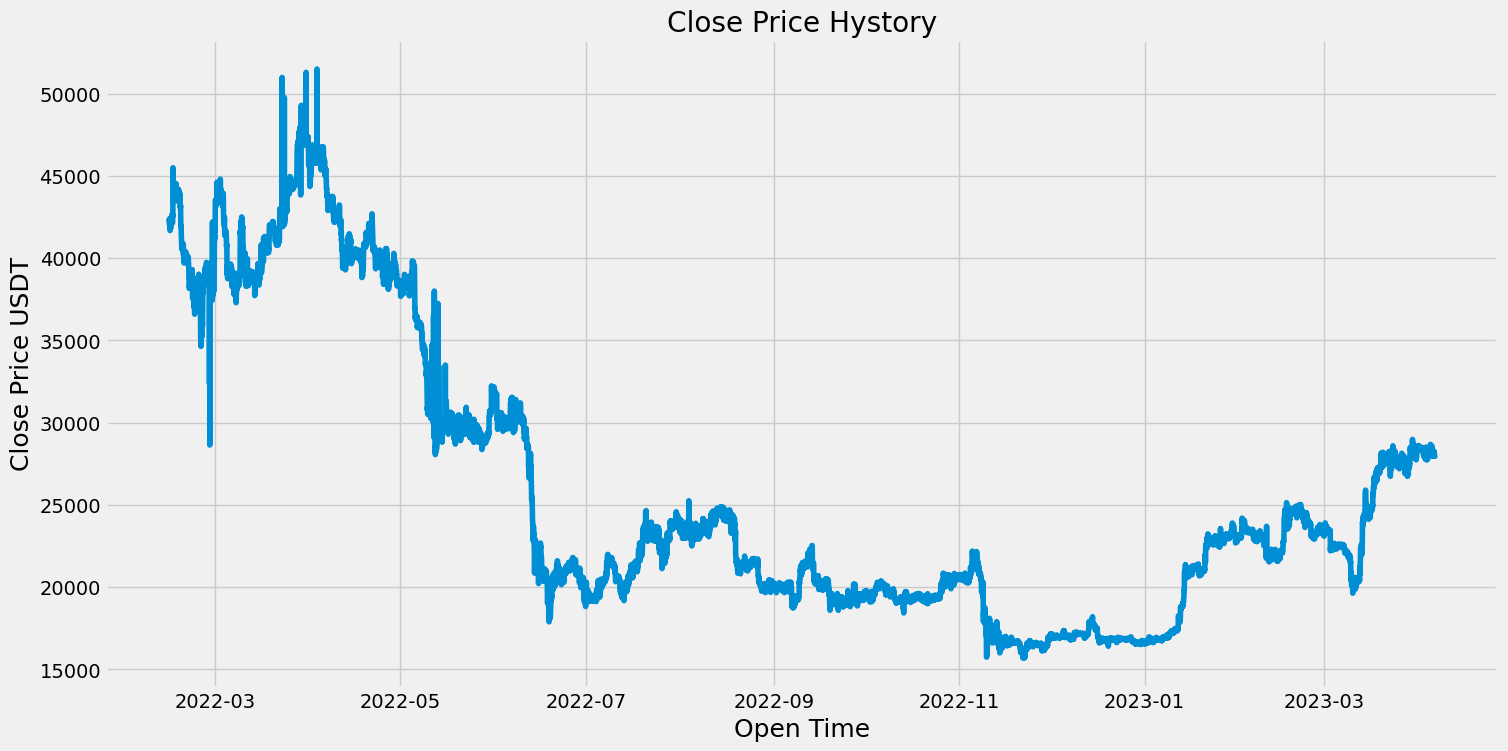

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Close Price Hystory')
plt.plot(df['Close'])
plt.xlabel('Open Time', fontsize=18)
plt.ylabel('Close Price USDT', fontsize=18)
plt.show()

In [ ]:
df.shape

(10000, 11)

In [ ]:
data = df.filter(['Close'])    # преобразование в массив
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)         # получаем кол-во строк для обучения

In [ ]:
training_data_len

8000

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))      # маштаб данных в диапозоне 0, 1
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.73541901],
       [0.74571525],
       [0.74130417],
       ...,
       [0.34260684],
       [0.34283297],
       [0.33925386]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]         # набор обучающих данных
x_train = []                                             # разделение на x_train, y_train
y_train = []

for i in range(60, len(train_data)):                      # добовляем последнии 60 значений в обучающий набр
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()




[array([0.73541901, 0.74571525, 0.74130417, 0.74505638, 0.73644361,
       0.7381522 , 0.72579002, 0.72690116, 0.73260485, 0.73813545,
       0.72905924, 0.73967375, 0.74362976, 0.73689868, 0.73681771,
       0.74101661, 0.73783673, 0.74948979, 0.74893143, 0.74919386,
       0.75236258, 0.75291257, 0.75082429, 0.74182345, 0.73824992,
       0.73983288, 0.74102778, 0.75288744, 0.75018775, 0.83249346,
       0.7752304 , 0.77809201, 0.77847728, 0.77633596, 0.77889047,
       0.77773466, 0.78229091, 0.78965295, 0.79193666, 0.79810938,
       0.79804796, 0.79503837, 0.79638962, 0.79159885, 0.79587871,
       0.79412266, 0.78845247, 0.79439905, 0.79107119, 0.79481782,
       0.79000193, 0.7948597 , 0.80578689, 0.79595967, 0.79085064,
       0.7924364 , 0.79018619, 0.7876568 , 0.79207904, 0.79191712])]
[0.7957726228331967]

[array([0.73541901, 0.74571525, 0.74130417, 0.74505638, 0.73644361,
       0.7381522 , 0.72579002, 0.72690116, 0.73260485, 0.73813545,
       0.72905924, 0.73967375, 0.743

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)              # преобразование в массив numpy

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))   # изменяем набор данных, LSTM принимает трех мерные данные
x_train.shape

(7940, 60, 1)

In [ ]:
model = Sequential()                                                            # модель LSTM
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
794/794 [==============================] - 40s 45ms/step - loss: 0.0013
Epoch 2/20
794/794 [==============================] - 37s 46ms/step - loss: 2.8803e-04
Epoch 3/20
794/794 [==============================] - 35s 44ms/step - loss: 2.4606e-04
Epoch 4/20
794/794 [==============================] - 36s 45ms/step - loss: 2.1778e-04
Epoch 5/20
794/794 [==============================] - 34s 43ms/step - loss: 1.7812e-04
Epoch 6/20
794/794 [==============================] - 35s 44ms/step - loss: 1.9504e-04
Epoch 7/20
794/794 [==============================] - 34s 43ms/step - loss: 1.8542e-04
Epoch 8/20
794/794 [==============================] - 35s 44ms/step - loss: 1.8957e-04
Epoch 9/20
794/794 [==============================] - 36s 45ms/step - loss: 1.7410e-04
Epoch 10/20
794/794 [==============================] - 34s 43ms/step - loss: 1.6168e-04
Epoch 11/20
794/794 [==============================] - 38s 48ms/step - loss: 1.6246e-04
Epoch 12/20
794/794 [========================

In [ ]:
test_data = scaled_data[training_data_len - 60:, :]           # создаем набор тэстовых данных
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)                                   # преобразование в массив

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))     # меняем форму данных

In [ ]:
predictions = model.predict(x_test)                                  # predict
predictions = scaler.inverse_transform(predictions)

63/63 [==============================] - 3s 34ms/step


In [ ]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

4.003521484374998

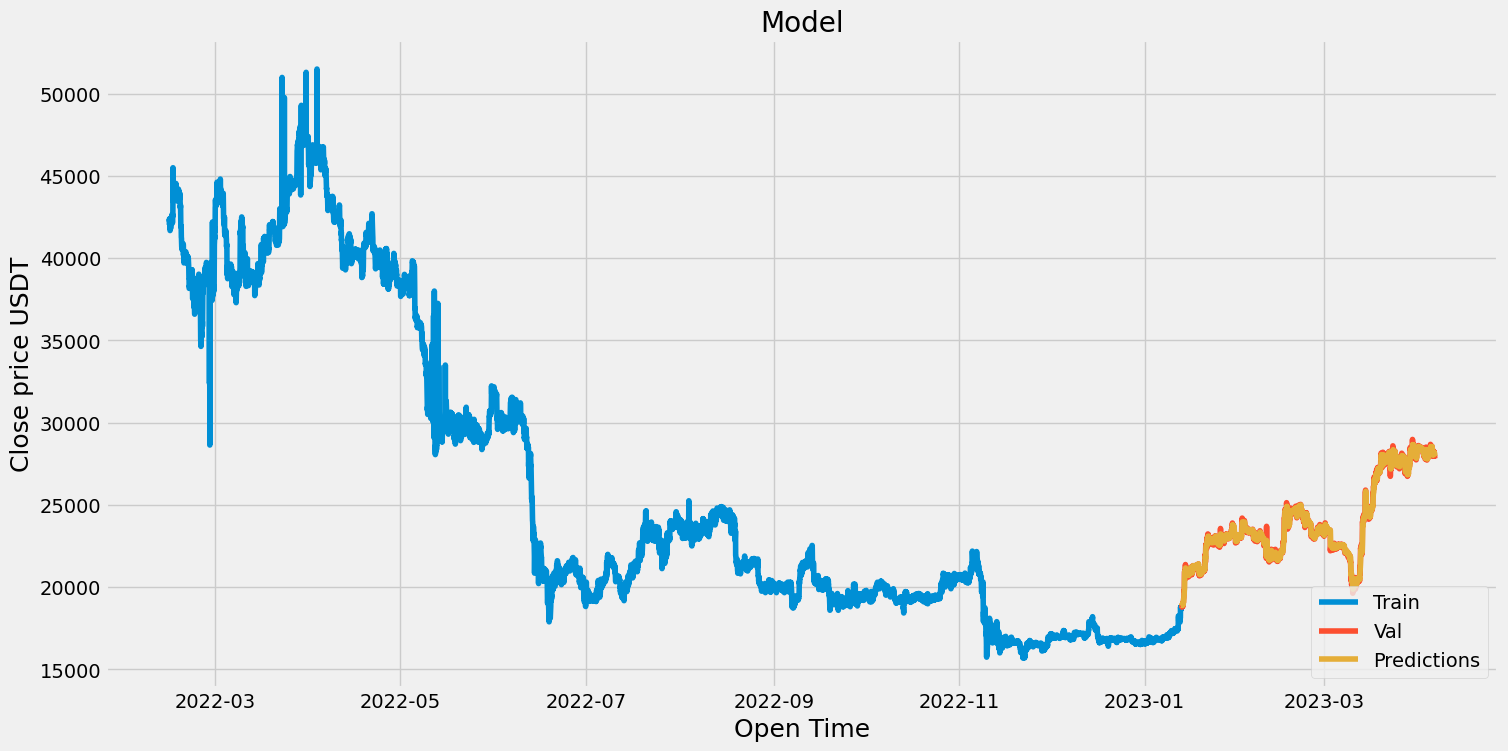

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Open Time', fontsize=18)
plt.ylabel('Close price USDT', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid                                                  # прогоз цен

,Close,Predictions
Opentime,,
2023-01-13 06:00:00,18876.6,18882.695312
2023-01-13 07:00:00,18830.6,18920.521484
2023-01-13 08:00:00,18786.3,18914.949219
2023-01-13 09:00:00,18849.9,18886.662109
2023-01-13 10:00:00,18819.0,18905.281250
...,...,...
2023-04-06 09:00:00,28223.1,28126.937500
2023-04-06 10:00:00,28055.2,28170.449219
2023-04-06 11:00:00,27952.8,28106.857422


In [ ]:
df_pred = df
new_df = df_pred.filter(['Close'])
last_hour = new_df[-60:].values
last_hour_scaled = scaler.transform(last_hour)
X_test = []
X_test.append(last_hour_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price )

1/1 [==============================] - 0s 51ms/step
[[27896.54]]
